In [5]:
from lightgbm import LGBMClassifier

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
dataset = load_breast_cancer()

In [11]:
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [12]:
cancer_df['target'] = dataset.target

In [13]:
x_features = cancer_df.iloc[:,:-1]

In [14]:
y_label = cancer_df.iloc[:,-1]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=156)

In [16]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=156)

In [17]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

In [18]:
pip install xgboost==1.6.0

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install lightgbm==3.3.1

     ---------------------------------------- 1.0/1.0 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.2
    Uninstalling lightgbm-3.3.2:
      Successfully uninstalled lightgbm-3.3.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\rkdus3696\\miniconda\\envs\\gyeon\\lib\\site-packages\\~-ghtgbm\\lib_lightgbm.dll'
Consider using the `--user` option or check the permissions.



In [28]:
evals = [(x_tr,y_tr),(x_val,y_val)]
lgbm_wrapper.fit(x_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\rkdus3696\miniconda\envs\gyeon\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\rkdus3696\miniconda\envs\gyeon\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	training's binary_logloss: 0.167198	valid_1's binary_logloss: 0.310105
[31]	training's binary_logloss: 0.161229	valid_1's binary_logloss: 0.307107
[32]	training's binary_logloss: 0.155494	valid_1's binary_logloss: 0.303837
[33]	training's binary_logloss: 0.149125	valid_1's binary_logloss: 0.300315
[34]	training's binary_logloss: 0.144045	valid_1's binary_logloss: 0.297816
[35]	training's binary_logloss: 0.139341	valid_1's binary_logloss: 0.295387
[36]	training's binary_logloss: 0.134625	valid_1's binary_logloss: 0.293063
[37]	training's binary_logloss: 0.129167	valid_1's binary_logloss: 0.289127
[38]	training's binary_logloss: 0.12472	valid_1's binary_logloss: 0.288697
[39]	training's binary_logloss: 0.11974	valid_1's binary_logloss: 0.28576
[40]	training's binary_logloss: 0.115054	valid_1's binary_logloss: 0.282853
[41]	training's binary_logloss: 0.110662	valid_1's binary_logloss: 0.279441
[42]	training's binary_logloss: 0.106358	valid_1's binary_logloss: 0.28113
[43]	training's 

LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [29]:
preds = lgbm_wrapper.predict(x_test)

In [30]:
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

In [31]:
#get_clf_eval = LGBMClassifier(random_state=0)

In [32]:
get_clf_eval(y_test,preds,pred_proba) 

TypeError: 'LGBMClassifier' object is not callable

In [30]:
from lightgbm import plot_importance

In [31]:
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

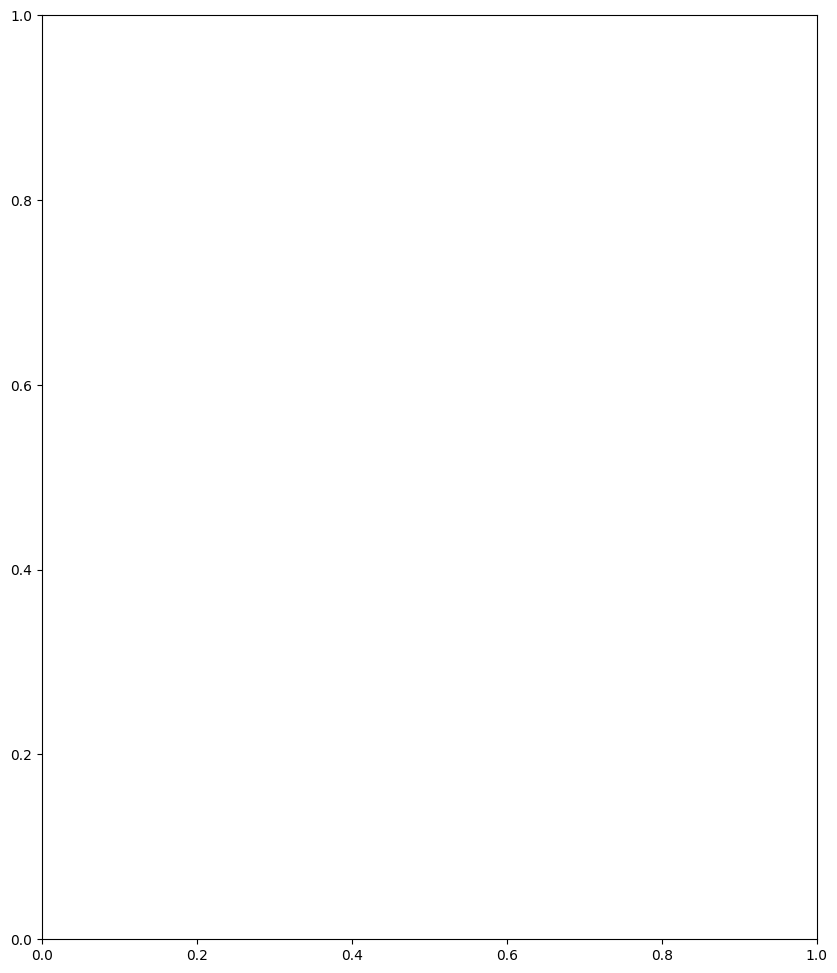

In [33]:
fig, ax = plt.subplots(figsize=(10,12))

ax = plot_importance(model, max_num_features=len(FEATURES), importance_type='split')
ax.set(title=f'Feature Importance (split)',
   xlabel='Feature Importance',
   ylabel='Features')
ax.figure.savefig(f'{PATH}/fi_split.png', dpi=300)


# GAIN
ax = lgb.plot_importance(model, max_num_features=len(FEATURES), importance_type='gain')
ax.set(title=f'Feature Importance (gain)',
   xlabel='Feature Importance',
   ylabel='Features')
ax.figure.savefig(f'{PATH}/fi_gain).png', dpi=300)